# Tugas 1 EDA: Kasus Penggunaan Energi
### Anggota Kelompok D EDA (A)
| No. | Nama| NPM|
|:---:|-----|:---:|
|1.|Achmad Rizki Baehaki|2106725066|
|2.|Diki Wahyudi|2106709131|
|3.|Luthfi Zahiya|2106709131|
|4.|Rachel Thyffani Margaretha Siahaan|2106726900|
|5.|Selvira Salsabila|2106656232|

Pastikan Anda telah mengunduh Kaggle API Token Anda pada tautan berikut ini. [Kaggle](https://www.kaggle.com/).<BR>
**Caranya**:
- Pergi ke Account, lalu scroll ke bawah sampai API section.
- Dengan menekan "Create New API Token", file `kaggle.json` akan terunduh.

In [ ]:
# Upload kaggle.json di sini
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Membuat kaggle folder
! mkdir ~/.kaggle/

In [ ]:
# Copy kaggle.json ke folder yang telah dibuat
! cp kaggle.json ~/.kaggle/

In [ ]:
# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c ashrae-energy-prediction

 99% 374M/379M [00:01<00:00, 217MB/s]
100% 379M/379M [00:01<00:00, 235MB/s]


In [ ]:
! unzip ashrae-energy-prediction.zip

Archive:  ashrae-energy-prediction.zip
  inflating: building_metadata.csv   
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
  inflating: weather_test.csv        
  inflating: weather_train.csv       


## **Import Data**

In [ ]:
# Import Data
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
building = pd.read_csv('building_metadata.csv')
weather_test = pd.read_csv('weather_test.csv')
weather_train = pd.read_csv('weather_train.csv')

## **Data Understanding**

**Data Building**

In [ ]:
building.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


Ditunjukkan 5 data teratas pada Data Building dari building_metadata.csv

Dari 5 data teratas sudah terlihat bahwa terdapat missing data pada kolom floor_count

In [ ]:
building.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


Melakukan deskripsi Data Building dalam DataFrame. Karena terdapat data numerik maka, deskripsi data berisi:


1.   Count - Menghitung nilai pada kolom yang tidak kosong
2.   Mean  - Nilai rata-rata
3.   Std   - Standar deviasi
4.   Min   - Nilai minimum
5.   25%   - Melakukan perhitungan persentil 25%
6.   50%   - Melakukan perhitungan persentil 50%
7.   75%   - Melakukan perhitungan persentil 75%
8.   Max   - Nilai Maksimum



In [ ]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


Ditunjukkan informasi yang ada pada Data Building seperti banyaknya columns, pelabelan columns, type data pada kolom, range index, dan memory usage.


Dari informasi pada Data Building diketahui bahwa terdapat data yang hilang (missing data), yaitu pada kolom year_built dan floor_built.

**Data Train**

In [ ]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


Ditunjukkan 5 data teratas pada Data Train dari train.csv

In [ ]:
train.describe()

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


Melakukan deskripsi Data Train dalam DataFrame. Karena terdapat data numerik maka, deskripsi data berisi:


1.   Count - Menghitung nilai pada kolom yang tidak kosong
2.   Mean  - Nilai rata-rata
3.   Std   - Standar deviasi
4.   Min   - Nilai minimum
5.   25%   - Melakukan perhitungan persentil 25%
6.   50%   - Melakukan perhitungan persentil 50%
7.   75%   - Melakukan perhitungan persentil 75%
8.   Max   - Nilai Maksimum


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


Ditunjukkan informasi yang ada pada Data Train seperti banyaknya columns, pelabelan columns, type data pada kolom, range index, dan memory usage

**Variable Target (Independent)**: meter_reading

**Data Weather Train**

In [ ]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


Ditunjukkan 5 data teratas pada Data Weather Train dari weather_train.csv

In [ ]:
weather_train.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


Melakukan deskripsi Data Weather Train dalam DataFrame. Karena terdapat data numerik maka, deskripsi data berisi:


1.   Count - Menghitung nilai pada kolom yang tidak kosong
2.   Mean  - Nilai rata-rata
3.   Std   - Standar deviasi
4.   Min   - Nilai minimum
5.   25%   - Melakukan perhitungan persentil 25%
6.   50%   - Melakukan perhitungan persentil 50%
7.   75%   - Melakukan perhitungan persentil 75%
8.   Max   - Nilai Maksimum


In [ ]:
weather_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


Ditunjukkan informasi yang ada pada Data Weather Train seperti banyaknya columns, pelabelan columns, type data pada kolom, range index, dan memory usage

Dari informasi pada Data Weather Train diketahui bahwa terdapat data yang hilang (missing data), yaitu pada kolom air_temperature, cloud_coverage, dew_temperature, precip_depth_1_hr, sea_level_pressure, wind_direction, wind_speed.

**Format data yang salah**: primary_use

In [ ]:
building['primary_use'] = building['primary_use'].astype('category')

In [ ]:
building.dtypes

site_id           int64
building_id       int64
primary_use    category
square_feet       int64
year_built      float64
floor_count     float64
dtype: object

Diketahui pada kolom meter tipe datanya adalah numerik, sehingga akan diubah menjadi kategorik. Dengan keterangan sebagai berikut:

*   0 = electricity
*   1 = chilledwater
*   2 = steam
*   3 = hotwater



In [ ]:
# Numerik -> Kategorik
train['meter'].replace({0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}, inplace = True)

In [ ]:
# Cek tipe data dari meter
train.dtypes

building_id        int64
meter             object
timestamp         object
meter_reading    float64
dtype: object

In [ ]:
# Tipe object -> category
train['meter'] = train['meter'].astype('category')
train.dtypes

### **Shape Data dan Duplicate Data**

Menunjukkan jumlah baris dan kolom dan jumlah duplicate data pada Data Train, Data Weather Train, dan Data Building

In [ ]:
print('Shape dari Data Train:', train.shape)
print('Duplikasi dari Data Train: ', train.duplicated().sum())
print('Shape dari Data Weather Train:', weather_train.shape)
print('Duplikasi dari Data Weather Train', weather_train.duplicated().sum())
print('Shape dari Data Building:', building.shape)
print('Suplikai dari Data Building: ', building.duplicated().sum())

Shape dari Data Train: (20216100, 4)
Duplikasi dari Data Train:  0
Shape dari Data Weather Train: (139773, 9)
Duplikasi dari Data Weather Train 0
Shape dari Data Building: (1449, 6)
Suplikai dari Data Building:  0


Dari codes di atas didapat bahwa:


1. Data Train

    Pada Data Train diketahui bahwa terdapat 1006836 baris dan 4 kolom dan juga tidak terdapat data yang berduplikasi.
2. Data Weather Train

    Pada Data Weather Train diketahui bahwa terdapat 139773 baris dan 9 kolom dan juga tidak terdapat data yang berduplikasi.
3. Data Building

    Pada Data Train diketahui bahwa terdapat 1449 baris dan 6 kolom dan juga tidak terdapat data yang berduplikasi.



### **Menghitung Jumlah meter di Setiap Gedung**

In [ ]:
df_meter = train.groupby('meter')['building_id'].nunique() # Jumlah building_id yang unique
for i in range(4):
    print("Jumlah gedung berdasarkan meter",i," : ",df_meter[i])

Jumlah gedung berdasarkan meter 0  :  498
Jumlah gedung berdasarkan meter 1  :  1413
Jumlah gedung berdasarkan meter 2  :  145
Jumlah gedung berdasarkan meter 3  :  324


In [ ]:
print("Jumlah unique bulilding_id :", train['building_id'].nunique())

Jumlah unique bulilding_id : 1449


## **Merge Data**
**Train Data**

Akan dilakukan penggabungan data dari tiga sumber data, yaitu Data Building, Data Train, dan Data Weather Train

In [ ]:
df_train_merge = train.merge(building, how ='left', on = 'building_id').merge(weather_train, how = 'left', on = ['site_id','timestamp'])

In [ ]:
df_train_merge.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,electricity,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,electricity,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,electricity,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,electricity,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,electricity,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


**Tambahan: Merge Data Test**


Untuk data test, tidak dilakukan run merge secara bersamaan karena keterbatasan RAM

In [ ]:
df_test_merge = test.merge(building, how = 'left',on = 'building_id').merge(weather_test, how = 'left', on = ['site_id','timestamp'])

In [ ]:
df_test_merge.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6


## **Menambahkan Kolom dari Informasi Data Timestamps**

In [ ]:
# Data timestamp akan diubah dalam format jam per hari, hari per minggu, dan bulan per tahun
import numpy as np
def break_datetime(df):
  df['timestamp'] = pd.to_datetime(df['timestamp'])
  df['hour'] = np.uint8(df['timestamp'].dt.hour)
  df['dayofweek'] = np.uint8(df['timestamp'].dt.dayofweek)
  df['month'] = np.uint8(df['timestamp'].dt.month)
  df['dayofyear'] = np.uint16(df['timestamp'].dt.dayofyear)
  df['day'] = np.uint16(df['timestamp'].dt.day)
  df['year'] = np.uint16(df['timestamp'].dt.year)
  return df

In [ ]:
df_train_merge = break_datetime(df_train_merge)

In [ ]:
df_train_merge.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,dayofweek,month,dayofyear,day,year
0,0,electricity,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,4,1,1,1,2016
1,1,electricity,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,4,1,1,1,2016
2,2,electricity,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,4,1,1,1,2016
3,3,electricity,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,4,1,1,1,2016
4,4,electricity,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,4,1,1,1,2016


### **Statistika Deskriptif Sebelum Data di Preprocesing**

In [ ]:
# Cek statistika deskriptif dari variabel target
df_train_merge['meter_reading'].describe()

count    2.021610e+07
mean     2.117121e+03
std      1.532356e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.877500e+01
75%      2.679840e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

In [ ]:
df_train_merge.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,dayofweek,month,dayofyear,day,year
0,0,electricity,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,4,1,1,1,2016
1,1,electricity,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,4,1,1,1,2016
2,2,electricity,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,4,1,1,1,2016
3,3,electricity,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,4,1,1,1,2016
4,4,electricity,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,4,1,1,1,2016


Akan dilakukan perhitungan value electricity, chilledwater, steam, dan hotwater pada variabel Meter



In [ ]:
df_train_merge["meter"].value_counts()

electricity     12060910
chilledwater     4182440
steam            2708713
hotwater         1264037
Name: meter, dtype: int64

Didapatkan pada variabel Meter bahwa value paling banyak terdapat di **electricity** dan paling sedikit **hotwater**

In [ ]:
df_meter = df_train_merge.groupby('meter').meter_reading.mean().reset_index()
df_meter

,meter,meter_reading
0,chilledwater,633.363924
1,electricity,170.825636
2,hotwater,385.866781
3,steam,13882.187689


Didapat bahwa **steam** memiliki energi yang paling tidak efisien dan **electricity** memiliki energi yang paling efisien.

In [ ]:
df_site = df_train_merge.groupby(['site_id']).meter_reading.mean().reset_index()
df_site.sort_values(by = "meter_reading", ascending = False)

,site_id,meter_reading
13,13,13612.172960
7,7,1217.419911
6,6,990.833067
14,14,659.994042
0,0,549.860779
10,10,464.013414
15,15,301.580289
9,9,263.069411
2,2,183.787944
4,4,181.087793


Tercatat bahwa pada site 13 sebagai konsumsi energi rata-rata tertinggi yang diikuti oleh site 7 dan site 6, sedangkan site 5 tercatat sebagai rata-rata konsumsi energi terendah

In [ ]:
print(df_train_merge[df_train_merge.meter_reading == df_train_merge.meter_reading.max()])

         building_id  meter           timestamp  meter_reading  site_id  \
8907488         1099  steam 2016-06-13 09:00:00     21904700.0       13   

        primary_use  square_feet  year_built  floor_count  air_temperature  \
8907488   Education       332884         NaN          NaN             19.4   

         ...  precip_depth_1_hr  sea_level_pressure  wind_direction  \
8907488  ...                0.0              1014.4            50.0   

         wind_speed  hour  dayofweek  month  dayofyear  day  year  
8907488         6.2     9          0      6        165   13  2016  

[1 rows x 22 columns]


In [ ]:
df_train_merge.iloc[8907488] # Data ini merupakan data maksimum, perlu dicek apakah ada outlier atau tidak di variabel meter_reading

building_id                          1099
meter                               steam
timestamp             2016-06-13 09:00:00
meter_reading                  21904700.0
site_id                                13
primary_use                     Education
square_feet                        332884
year_built                            NaN
floor_count                           NaN
air_temperature                      19.4
cloud_coverage                        NaN
dew_temperature                      17.2
precip_depth_1_hr                     0.0
sea_level_pressure                 1014.4
wind_direction                       50.0
wind_speed                            6.2
hour                                    9
dayofweek                               0
month                                   6
dayofyear                             165
day                                    13
year                                 2016
Name: 8907488, dtype: object

## **Outliers**

In [ ]:
# Misalnya dengan asumsi data berdistribusi normal
# Dan menggunakan 95% confidence interval di sekitar variabel meter_reading
# Akan dicek apakah ada data di luar confidence interval tersebut yang dapat dianggap sebagai outlier
import numpy as np
df_outlier = np.abs(df_train_merge.meter_reading - df_train_merge.meter_reading.mean())<=(2*df_train_merge.meter_reading.std())
# mu-2s<x<mu+2s
print(df_outlier.shape)
df_outlier.head()

(20216100,)


0    True
1    True
2    True
3    True
4    True
Name: meter_reading, dtype: bool

In [ ]:
df_outlier.value_counts() # Terdapat 4105 outliers

True     20211995
False        4105
Name: meter_reading, dtype: int64

Data-data yang tidak terletak dalam 95% confidence interval akan dihapus.

In [ ]:
drop_indices = list(df_outlier[df_outlier == False].index)
df_train_merge.drop(drop_indices, axis = 0, inplace = True)

## **Noise**

Dalam data meter_reading banyak elemennya yang 0,00.. yang mana tidak masuk akal dalam dunia nyata. Hal tersebut mungkin terjadi karena terdapat error atau pembacaan aktualnya tidak tersedia pada waktu timestamps tersebut.

In [ ]:
# Hapus data yang mengandung 0 pada kolom meter_reading
drop_0readings= list(df_train_merge[df_train_merge['meter_reading'] == 0.0].index)
df_train_merge.drop(drop_0readings, axis = 0, inplace = True)

## **Missing Values**
**Data Train**

In [ ]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Persentase Missing Values'])
missing_train_data.head(4)

,Total,Persentase Missing Values
building_id,0,0.0
meter,0,0.0
timestamp,0,0.0
meter_reading,0,0.0


Tidak ada missing values di Data Train

**Data Weather train**

In [ ]:
total = weather_train.isnull().sum().sort_values(ascending = False)
percent = (weather_train.isnull().sum()/weather_train.isnull().count()*100).sort_values(ascending = False)
missing_weather_test_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Persentase Missing Values'])
missing_weather_test_data.head(9)

,Total,Persentase Missing Values
cloud_coverage,69173,49.489529
precip_depth_1_hr,50289,35.979052
sea_level_pressure,10618,7.596603
wind_direction,6268,4.484414
wind_speed,304,0.217496
dew_temperature,113,0.080845
air_temperature,55,0.039350
site_id,0,0.000000
timestamp,0,0.000000


Sekitar 50% dari data cloud_coverage hilang dan sekitar 36% dari data precip_depth hilang dalam Data Weather Train.

**Data Building**

In [ ]:
total = building.isnull().sum().sort_values(ascending = False)
percent = (building.isnull().sum()/building.isnull().count()*100).sort_values(ascending = False)
missing_building_meta_df = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percentase Missing Values'])
missing_building_meta_df.head(6)

,Total,Percentase Missing Values
floor_count,1094,75.500345
year_built,774,53.416149
site_id,0,0.000000
building_id,0,0.000000
primary_use,0,0.000000
square_feet,0,0.000000


Sekitar 75% data floor_count hilang dan sekitar 53% data year_built hilang dalam Data Building Meta

### **Missing Value Imputation**

In [ ]:
# Cek persentase missing values di setiap kolom
def percent_missing_val(df):
  percent_missing = (df.isnull().sum() * 100) / len(df)
  missing_value_df = pd.DataFrame({'Nama Kolom': df.columns,
                                 'Persentase Missing Values': percent_missing})
  return missing_value_df

In [ ]:
missing_value_train = percent_missing_val(df_train_merge) # Dari data yang telah di-merge

In [ ]:
missing_value_train

,Nama Kolom,Persentase Missing Values
building_id,building_id,0.000000
meter,meter,0.000000
timestamp,timestamp,0.000000
meter_reading,meter_reading,0.000000
site_id,site_id,0.000000
primary_use,primary_use,0.000000
square_feet,square_feet,0.000000
year_built,year_built,60.147206
floor_count,floor_count,82.259087
air_temperature,air_temperature,0.487763


Karena data year_built dan floor_count memiliki lebih dari 50% data yang hilang, maka akan dihapus kedua kolom tersebut.

In [ ]:
df_train_merge.drop(['year_built', 'floor_count'], axis = 1, inplace = True)

In [ ]:
df_train_merge.isnull().sum()

building_id                 0
meter                       0
timestamp                   0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
air_temperature         89446
cloud_coverage        7973675
dew_temperature         92541
precip_depth_1_hr     3521882
sea_level_pressure    1187761
wind_direction        1326021
wind_speed             132571
hour                        0
dayofweek                   0
month                       0
dayofyear                   0
day                         0
year                        0
dtype: int64

Karena terdapat banyak missing values (NaN) di 4 kolom yaitu cloud_coverage, precip_depth_1_hr, wind_direction, dan sea_level_pressure, maka missing values tersebut akan di-impute dengan nilai mediannya. Untuk missing values dari kolom data yang lain, akan di-impute dengan nilai rata-ratanya (mean).


In [ ]:
def nan_fillers(df):
  air_temp_df = df.groupby(['site_id', 'day', 'month'])['air_temperature'].transform('mean')
  df['air_temperature'].fillna(air_temp_df, inplace = True)

  dew_temp_df = df.groupby(['site_id', 'day', 'month'])['dew_temperature'].transform('mean')
  df['dew_temperature'].fillna(dew_temp_df, inplace = True)

  cloud_df = df.groupby(['site_id', 'day', 'month'])['cloud_coverage'].transform('mean')
  df['cloud_coverage'].fillna(cloud_df, inplace = True)

  sea_level_df = df.groupby(['site_id', 'day', 'month'])['sea_level_pressure'].transform('mean')
  df['sea_level_pressure'].fillna(sea_level_df, inplace = True)

  precip_df = df.groupby(['site_id', 'day', 'month'])['precip_depth_1_hr'].transform('mean')
  df['precip_depth_1_hr'].fillna(precip_df, inplace = True)

  wind_speed_df = df.groupby(['site_id', 'day', 'month'])['wind_speed'].transform('mean')
  df['wind_speed'].fillna(wind_speed_df, inplace = True)

  return df

In [ ]:
df_train_merge = nan_fillers(df_train_merge)

In [ ]:
df_train_merge['cloud_coverage'].fillna(df_train_merge['cloud_coverage'].median(), inplace = True)
df_train_merge['sea_level_pressure'].fillna(df_train_merge['sea_level_pressure'].median(), inplace = True)
df_train_merge['precip_depth_1_hr'].fillna(df_train_merge['precip_depth_1_hr'].median(), inplace = True)
df_train_merge['wind_direction'].fillna(df_train_merge['wind_direction'].median(), inplace = True)

In [ ]:
df_train_merge.isnull().sum()

building_id           0
meter                 0
timestamp             0
meter_reading         0
site_id               0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
hour                  0
dayofweek             0
month                 0
dayofyear             0
day                   0
year                  0
dtype: int64

## **Statistika Deskriptif Sesudah Data di Preprocesing**

In [ ]:
df_train_merge.describe()

,building_id,meter_reading,site_id,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,dayofweek,month,dayofyear,day,year
count,1.833802e+07,1.833802e+07,1.833802e+07,1.833802e+07,1.833802e+07,1.833802e+07,1.833802e+07,1.833802e+07,1.833802e+07,1.833802e+07,1.833802e+07,1.833802e+07,1.833802e+07,1.833802e+07,1.833802e+07,1.833802e+07,18338019.0
mean,8.052116e+02,4.838895e+02,8.033691e+00,1.073358e+05,1.598970e+01,2.412510e+00,7.820208e+00,8.710782e-01,1.016074e+03,1.733677e+02,3.380962e+00,1.152215e+01,3.002632e+00,6.651627e+00,1.877444e+02,1.579609e+01,2016.0
std,4.203850e+02,2.501545e+03,5.051055e+00,1.168973e+05,1.087615e+01,2.486587e+00,1.014793e+01,7.072918e+00,6.898930e+00,1.098713e+02,2.269933e+00,6.910526e+00,1.995686e+00,3.421007e+00,1.048053e+02,8.817787e+00,0.0
min,0.000000e+00,1.000000e-04,0.000000e+00,2.830000e+02,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2016.0
25%,4.150000e+02,2.975600e+01,3.000000e+00,3.131600e+04,8.700000e+00,0.000000e+00,6.000000e-01,0.000000e+00,1.011900e+03,8.000000e+01,2.100000e+00,6.000000e+00,1.000000e+00,4.000000e+00,1.000000e+02,8.000000e+00,2016.0
50%,8.950000e+02,9.798000e+01,9.000000e+00,7.210200e+04,1.670000e+01,2.000000e+00,8.900000e+00,0.000000e+00,1.016000e+03,1.800000e+02,3.100000e+00,1.200000e+01,3.000000e+00,7.000000e+00,1.900000e+02,1.600000e+01,2016.0
75%,1.180000e+03,3.101250e+02,1.300000e+01,1.400920e+05,2.390000e+01,4.000000e+00,1.610000e+01,0.000000e+00,1.020200e+03,2.700000e+02,4.600000e+00,1.800000e+01,5.000000e+00,1.000000e+01,2.780000e+02,2.300000e+01,2016.0
max,1.448000e+03,3.078650e+05,1.500000e+01,8.750000e+05,4.720000e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01,2.300000e+01,6.000000e+00,1.200000e+01,3.660000e+02,3.100000e+01,2016.0


In [ ]:
df_train_merge["meter"].value_counts()

electricity     11530741
chilledwater     3525024
steam            2358560
hotwater          923694
Name: meter, dtype: int64

Meter tarbanyak yaitu **electricity** dan yang paling sedikit **hotwater**

In [ ]:
df_meter = df_train_merge.groupby('meter').meter_reading.mean().reset_index()
df_meter.sort_values(by = "meter_reading", ascending = False)

,meter,meter_reading
3,steam,1755.585159
0,chilledwater,619.813806
2,hotwater,528.042716
1,electricity,178.679985


**steam** merupakan energi yang paling tidak efisien and **hotwater** energi yang paling efisien.

## **Cek Correlation**

In [ ]:
df_train_merge.corr()

,building_id,meter_reading,site_id,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,dayofweek,month,dayofyear,day,year
building_id,1.000000,0.077982,0.980334,0.091049,-0.304798,-0.174217,-0.096749,0.046881,0.077568,0.049684,0.004022,0.001454,-0.000277,-0.015685,-0.015799,-0.002356,NaN
meter_reading,0.077982,1.000000,0.089231,0.239891,-0.065398,0.023219,-0.050583,0.003208,0.008452,0.014862,0.014414,0.005555,-0.006083,-0.003668,-0.003696,-0.001070,NaN
site_id,0.980334,0.089231,1.000000,0.096952,-0.295558,-0.143599,-0.122283,0.046483,0.054585,0.049272,0.010108,0.001746,-0.000427,-0.011963,-0.012090,-0.002256,NaN
square_feet,0.091049,0.239891,0.096952,1.000000,-0.011158,-0.017767,-0.019827,0.013315,-0.017383,-0.014342,-0.038995,-0.000760,-0.000062,-0.002740,-0.002742,-0.000350,NaN
air_temperature,-0.304798,-0.065398,-0.295558,-0.011158,1.000000,0.002093,0.751787,0.008610,-0.305965,-0.085676,-0.086711,0.117754,-0.006416,0.174269,0.174382,0.025584,NaN
cloud_coverage,-0.174217,0.023219,-0.143599,-0.017767,0.002093,1.000000,0.089387,0.055770,-0.124261,0.004225,0.187742,0.034461,0.003926,-0.010574,-0.010309,0.003802,NaN
dew_temperature,-0.096749,-0.050583,-0.122283,-0.019827,0.751787,0.089387,1.000000,0.079831,-0.218271,-0.159834,-0.144700,0.000663,-0.003335,0.253578,0.253312,0.023763,NaN
precip_depth_1_hr,0.046881,0.003208,0.046483,0.013315,0.008610,0.055770,0.079831,1.000000,-0.060665,-0.011226,0.026692,0.002839,0.006771,0.013638,0.013163,-0.004028,NaN
sea_level_pressure,0.077568,0.008452,0.054585,-0.017383,-0.305965,-0.124261,-0.218271,-0.060665,1.000000,-0.095321,-0.199557,0.003508,0.001363,0.117415,0.118550,0.012761,NaN
wind_direction,0.049684,0.014862,0.049272,-0.014342,-0.085676,0.004225,-0.159834,-0.011226,-0.095321,1.000000,0.422812,0.060360,0.009003,-0.024906,-0.026198,-0.017068,NaN


Untuk mempermudah pengecekan korelasi, maka digunakan visualisasi dengan HeatMap

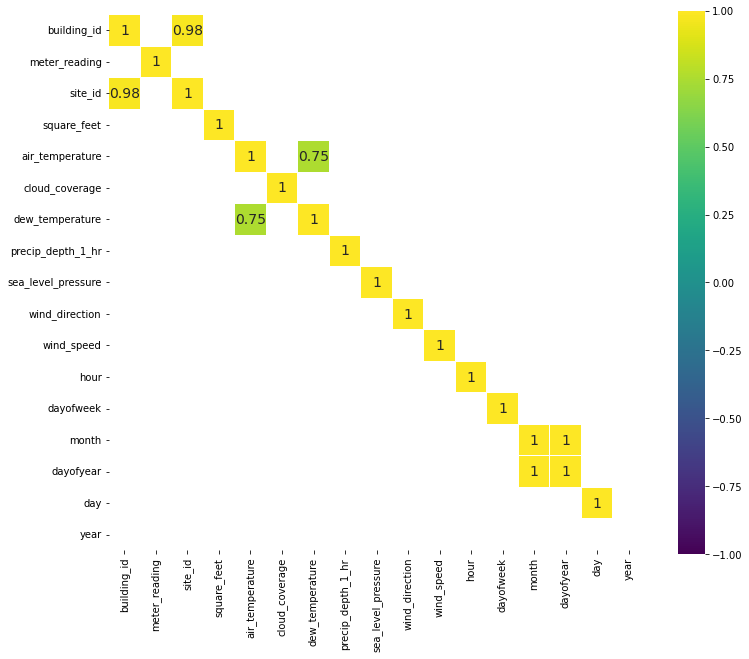

In [ ]:
# HeatMap untuk menyelidiki korelasi
# HeatMap akan menampilkan korelasi yang >= 0.5 dan <= -0.4
import matplotlib.pyplot as plt
import seaborn as sns
corr = df_train_merge.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

air_temperature dengan dew_temperature memiliki korelasi yang kuat, yaitu 0,75 (positif), berarti memiliki hubungan linier yang kuat. Data building_id dan site_id memiliki korelasi yang kuat yaitu 0,98. Namun, kedua data tersebut hanya merupakan nomor bangunan dan lokasi bangunan saja, jadi tidak terlalu dibutuhkan pengaruhnya.

## **Saving Preprocessed Data**

In [ ]:
df_train_merge.to_csv("train_preprocessed.csv", encoding ='utf8')
# Download preprocesed data di file